## **AlexNet**
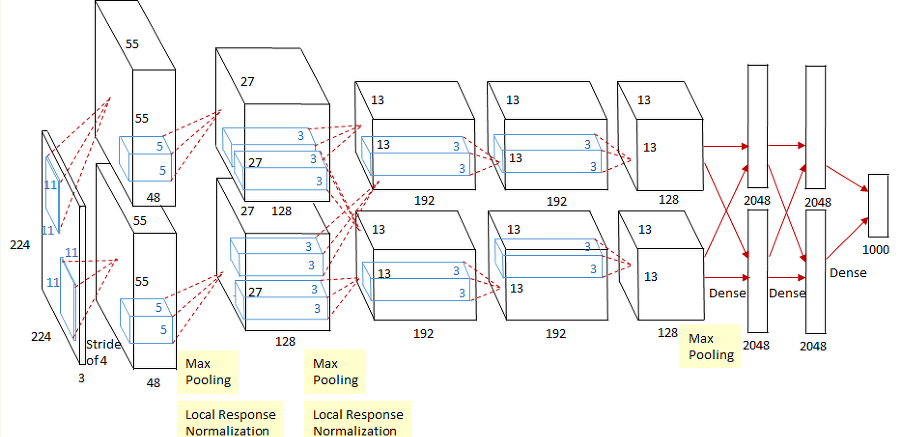

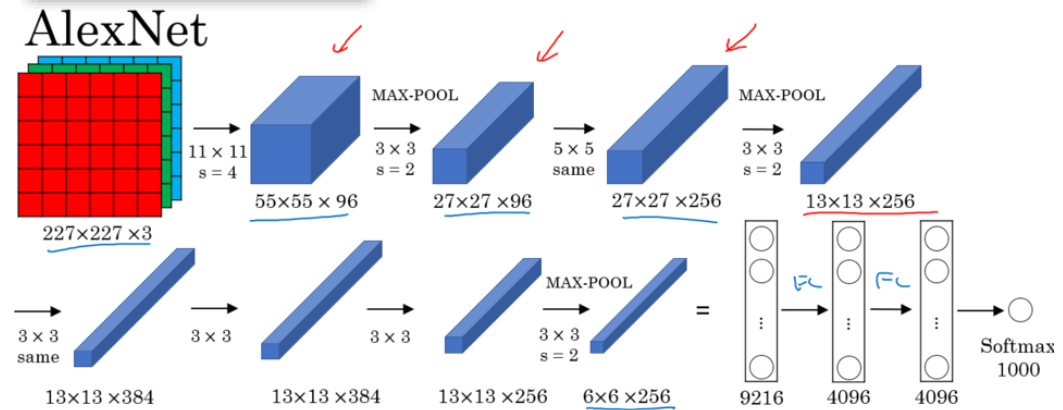

AlexNet의 구조는 LeNet-5와 크게 다르지 않으나 두개의 병렬적인 구조로 설계되었다. 기존 CNN 모델들의 과적합 문제를 해결하기 위해 설계되었고 이전과 크게 다른 점은 Relu 활성화 함수와 두 개의 GPU를 사용 한다는 것이다. 약 6200만개의 파라미터를 가지고, 약 6억 3000만의 연산량을 갖는다. 총 8개의 layer로 구성되어 있으며 **5개의 convolution layer**, 3개의 Pooling layer, 2개의 local response normalization layer, **3개의 fully-connected layer**로 세분화 할 수 있다.
#### **입력층**
227x227x3의 이미지, 너비와 높이가 227인 컬러 이미지
#### **첫번째 레이어(합성곱 층)**
227x227x3의 이미지 입력을 11x11x3 fiter 96개로 합성곱 연산한다.
zero-padding은 사용하지 않고(즉, valid-padding을 사용한다.)
활성화 함수는 Relu, strides는 4로 한다.
합성곱 연산 결과 55x55x96 특성맵이 만들어 진다.
그 다음 3x3 overlapping max pooling이 strides 2로 시행되어 27x27x96 특성맵이 만들어 진다.
그 후 local response normalization을 적용한다. LRN을 시행해도 특성맵의 차원이 변화되지 않는다.
- **Local Response Normalization(LRN)**: AlexNet에서는 측면 억제 현상을 사용한다. 그 이유는 활성화 함수 Relu 때문이다. Relu가 양수의 방향은 입력값을 그대로 사용하기 때문에 Conv나 Pooling시 매우 높은 픽셀값이 존재할 때 주변 픽셀에 영향을 미칠 수 있다. 이것을 방지하기 위해 같은 위치에 있는 픽셀끼리 정규화를 해주는 것이다. 

#### **두번째 레이어(합성곱 층)**
첫번째 레이어의 27x27x96을 5x5x48 fiter 256개로 합성곱 연산한다.
zero-padding은 2(구현 시 same-padding을 사용), strides는 1, 활성화 함수는 Relu로 한다. 
합성곱 연산 결과 27x27x256 특성맵이 만들어 진다.
overlapping max pooling으로 13x13x256 특성맵을 얻는다.(커널 사이즈는 3x3, strides는 2로 한다.)
마찬가지로 LRN을 시행한다.
#### **세번째, 네번째 레이어(합성곱 층)**
384개의 3x3x256 커널을 사용해 13x13x384 특성맵을 얻는다.
strides와 zero-padding은 1(구현 시 same-padding을 사용), 활성화 함수는 Relu로 한다.
#### **다섯번째 레이어(합성곱 층)**
256개의 3x3x384 커널을 사용해 13x13x256 특성맵을 얻는다.
strides와 zero-padding은 1(구현 시 same-padding을 사용), 활성화 함수는 Relu로 한다. 3x3 overlapping maxpooling을 stride 2로 하여 6x6x256 특성맵을 얻는다.
#### **여섯번째 레이어(완전연결층)**
다섯번째 레이어에서 얻은 특성맵을 Flatten하여 4096개의 뉴런과 fully-connected 한다. 활성화 함수는 Relu로 한다.
#### **일곱번째 레이어(완전연결층)**
여섯번째 레이어의 뉴런 4096개와 일곱번째 레이어의 4096개의 뉴런과 fully-connected 한다. 출력값을 Relu함수로 활성화 한다.
#### **여덟번째 레이어(완전연결층)**
일곱번째 레이어의 뉴런 4096개와 여덟번째 레이어의 1000개의 뉴런과 fully-connected 한다. 출력값을 Softmax함수로 활성화 한다. 활성화된 값은 각 1000개의 클래스에 속할 확률을 표현한다.



---
과대 적합을 방지하는 방법
- data augmentation
- dropout

[출처]
- https://bskyvision.com/421
- https://taeguu.tistory.com/29
- https://warm-uk.tistory.com/m/44



In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, BatchNormalization
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dropout

In [ ]:
def AlexNet():
  alex = tf.keras.Sequential()
  alex.add(Conv2D(96, (11,11), strides=4, padding='valid', activation='relu', input_shape=(227,227,3)))
  alex.add(MaxPooling2D((3,3), strides=2))
  alex.add(BatchNormalization())
  
  alex.add(Conv2D(256, (5,5), strides=1, padding='same', activation='relu'))  # zero-padding = 2
  alex.add(MaxPooling2D((3,3), strides=2))
  alex.add(BatchNormalization())
  
  alex.add(Conv2D(384, (3,3), strides=1, padding='same', activation='relu'))  # zero-padding = 1
  
  alex.add(Conv2D(384, (3,3), strides=1, padding='same', activation='relu'))  # zero-padding = 1
  
  alex.add(Conv2D(256, (3,3), strides=1, padding='same', activation='relu'))  # zero-padding = 1
  alex.add(MaxPooling2D((3,3), strides=2))
  
  alex.add(Flatten())
  alex.add(Dense(4096, activation='relu'))
  alex.add(Dense(4096, activation='relu'))
  alex.add(Dense(1000, activation='softmax'))
  
  return alex

In [ ]:
model = AlexNet()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 13, 13, 256)       1024      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 13, 13, 384)      